# Classifying bank customers into groups based on their ability to repay facilitates the acceptance or refusal of loan applications, and simplifies the determination and calculation of interest rates for the approved lending categories.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week18/Data/cust_seg.csv', index_col='Customer Id')
df = df.drop(columns=['Unnamed: 0'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum().sum()

150

In [ ]:
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [ ]:
filter = df['Defaulted'].isna()
df[filter]

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
6,40,1,23,81,0.998,7.831,NaN,10.9
9,26,1,5,18,0.575,2.215,NaN,15.5
12,34,2,9,40,0.374,0.266,NaN,1.6
14,46,1,6,30,1.415,3.865,NaN,17.6
16,24,1,1,16,0.185,1.287,NaN,9.2
...,...,...,...,...,...,...,...,...
819,35,2,0,35,2.383,1.957,NaN,12.4
821,37,1,4,24,0.419,2.989,NaN,14.2
826,32,2,12,116,4.027,2.585,NaN,5.7


In [ ]:
df = df.dropna()
# df = df.fillna(df['Defaulted'].median())
df.isna().sum().sum()

0

In [ ]:
df.describe().loc[['mean', 'min', 'max']]

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
mean,34.86,1.722857,8.388571,45.601429,1.553566,3.058196,0.261429,10.260571
min,20.00,1.000000,0.000000,14.000000,0.012000,0.046000,0.000000,0.400000
max,56.00,5.000000,31.000000,446.000000,20.561000,27.034000,1.000000,41.300000


In [ ]:
# Scale the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.768304,0.298793,-0.359007,-0.723102,-0.675699,-0.604284,-0.594950,-0.580528
1,1.519090,-0.779325,2.647029,1.478707,1.431421,1.570620,-0.594950,0.372222
2,-0.232744,0.298793,0.242201,0.309845,2.154119,0.835201,1.680814,1.559495
3,-0.733267,0.298793,-0.659610,-0.723102,-0.412427,-0.773833,-0.594950,-0.580528
4,1.519090,-0.779325,3.398538,5.637681,3.665215,1.780653,-0.594950,-0.448609


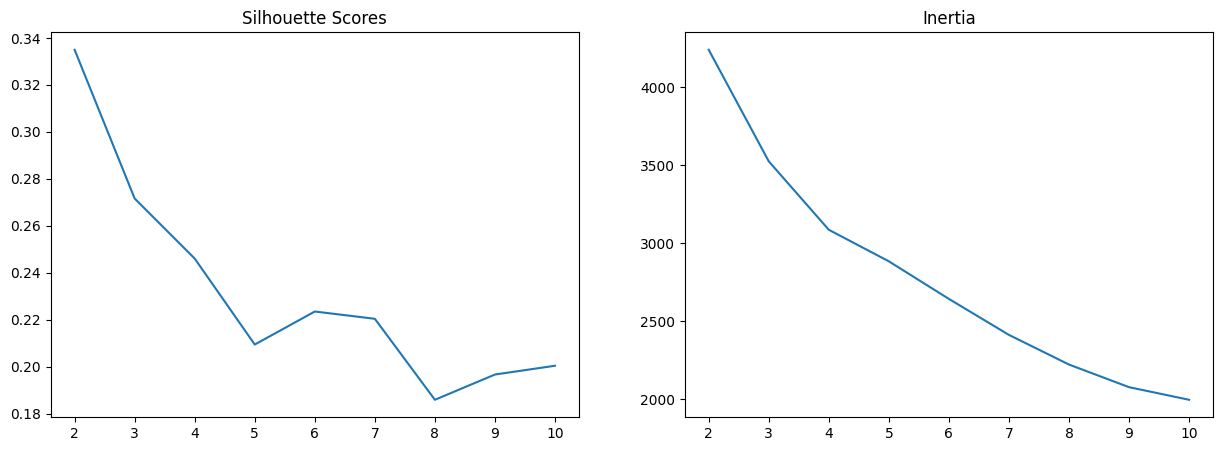

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(scaled_df)
  sils.append(silhouette_score(scaled_df, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [ ]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=3, n_init= 'auto', random_state=42)
kmeans.fit(scaled_df)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,1
2,47,1,26,100,4.582,8.218,0.0,12.8,0
3,33,2,10,57,6.111,5.802,1.0,20.9,2
4,29,2,4,19,0.681,0.516,0.0,6.3,1
5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [ ]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,43.112000,1.960000,16.904000,96.056000,4.172896,7.811616,0.208000,14.398400
1,1,33.727053,1.601449,7.644928,36.246377,0.788126,1.748710,0.000000,7.581884
2,2,31.366460,1.850932,3.689441,30.484472,1.488199,2.734901,0.975155,13.936025


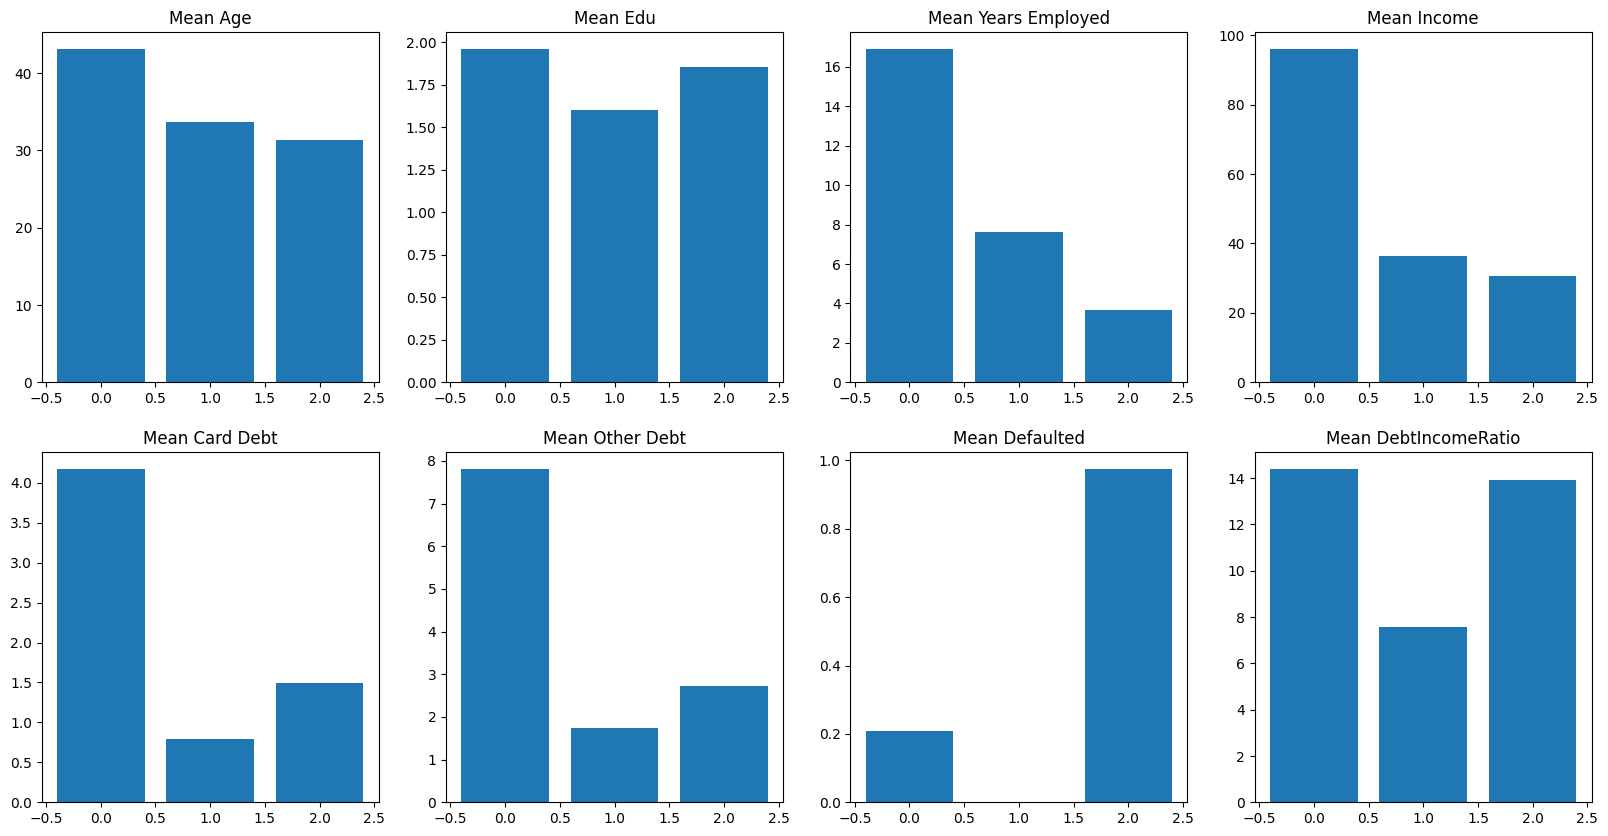

In [ ]:
# Visualize means
fig, axes = plt.subplots(2,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')



In [ ]:
df['cluster'].value_counts(dropna=False, normalize=True)

1    0.591429
2    0.230000
0    0.178571
Name: cluster, dtype: float64

## cluster 0
  This group is the highest in age among the rest of the groups, and therefore the highest in average years of work and the highest in income by a large margin (due to more years of experience). As for the degree of education, it is also the highest, but with a limited difference from Group 1. As for card debts and other debts, they are the highest by a large margin. As for the debtIncome ratio, it is slightly higher than group 2.
  



---



---



## cluster 1
  This group (representing 59% of the data) has the lowest education level, slightly below the other groups. The average years of work experience for this group is eight years, which is less than the first group and more than the last group. This group has the lowest total debt (credit card debt and other debts), and it also has a significantly lower debtIncome ratio compared to the other groups. Furthermore, the defaulted rate is almost negligible, indicating that this group is almost entirely meeting its payment obligations on time.



---



---



## cluster 2
  
This group represents the youngest age among the other groups, with an average education level. It has the least work experience compared to the other groups and the lowest income, albeit slightly lower than cluster 1. In terms of total debt (credit card debt and other debts), it is slightly higher than cluster 1. The debtIncome ratio is close to that of cluster 0. Additionally, most individuals in this group have payment delinquencies.



---



---



## Recommendations

  - Do not lend to cluster 2, as most members of this cluster do not pay their debts.

  - As for cluster 0, I think it is the most profitable due to its reasonable level of risk, as it can be loaned to, but at relatively high interest rates than the rest of the clusters (note that most of the members of this cluster already have loans, that is, they are actual customers).

  - As for cluster 1 is the safest cluster, it has the lowest total debt and the highest repayment rate. This is due relatively to this cluster's lack of reliance on borrowing, which prompts us to focus on marketing to this cluster and facilitating their obtaining loans with relatively low interest rates, and this cluster represents most of the statistical sample , thus representing a large number of potential customers.